<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Support Vector Machine (Regression) - (Position Salaries Dataset)</h3>
    <h4 align="center"><a href="http://www.linkedin.com/in/sajjad-shurgashti-bb7684326">Sajjad Shurgashti</a></h5>
</div>

## What is SVR?

<img src = "https://miro.medium.com/max/788/1*25Kk53QBOpBie4_qMSTnAA.png" width=55%>

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations. The violation concept in this example represents as ε (epsilon).

## Generate sample data

In [7]:
import numpy as np

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [ ]:
X

array([[0.18178402],
       [0.40932551],
       [1.04325093],
       [1.12671799],
       [1.16988031],
       [1.18523056],
       [1.27740823],
       [1.38133491],
       [1.41722091],
       [1.54892111],
       [1.5536454 ],
       [1.71482904],
       [1.772389  ],
       [1.81974296],
       [1.91888   ],
       [1.9624676 ],
       [2.23266972],
       [2.40653188],
       [2.48784338],
       [2.51454337],
       [2.52157835],
       [2.76925304],
       [2.8171503 ],
       [2.89135479],
       [2.95251398],
       [2.98458969],
       [2.9857765 ],
       [3.01345231],
       [3.06785371],
       [3.06787285],
       [3.56856091],
       [3.65257741],
       [3.65815759],
       [3.82643149],
       [4.13674695],
       [4.38780913],
       [4.43839664],
       [4.72557738],
       [4.98203105],
       [4.99012175]])

In [ ]:
y

array([ 0.18078448,  0.39799065,  0.86404535,  0.90300702,  0.92070389,
        0.92658581,  0.95726954,  0.98210581,  0.98823046,  0.99976075,
        0.99985293,  0.98964521,  0.97974892,  0.96917249,  0.94002809,
        0.92427237,  0.78884224,  0.67063224,  0.60816688,  0.58675794,
        0.5810468 ,  0.36379573,  0.31878028,  0.24763442,  0.18795407,
        0.15635874,  0.15518642,  0.12778995,  0.07367214,  0.07365305,
       -0.41411314, -0.48903645, -0.4938962 , -0.6325482 , -0.83884297,
       -0.9477848 , -0.96269834, -0.99991303, -0.96386631, -0.96167953])

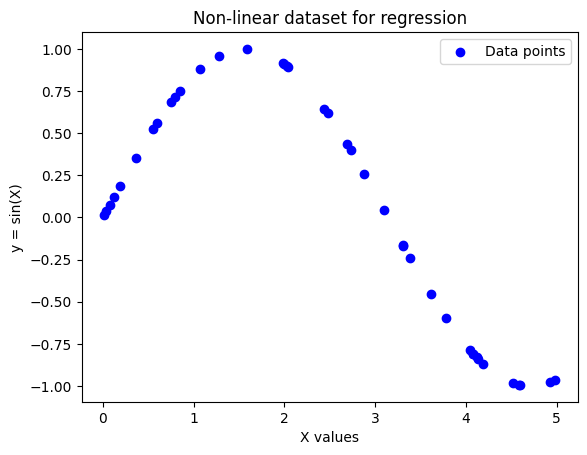

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label="Data points")
plt.xlabel("X values")
plt.ylabel("y = sin(X)")
plt.title("Non-linear dataset for regression")
plt.legend()
plt.show()


## Add some Noise

In [9]:
y[::5] += 3 * (0.5 - np.random.rand(8))

In [ ]:
y

array([ 0.55590218,  0.39799065,  0.86404535,  0.90300702,  0.92070389,
        1.55967143,  0.95726954,  0.98210581,  0.98823046,  0.99976075,
        0.37453059,  0.98964521,  0.97974892,  0.96917249,  0.94002809,
       -0.19513149,  0.78884224,  0.67063224,  0.60816688,  0.58675794,
       -0.34266279,  0.36379573,  0.31878028,  0.24763442,  0.18795407,
        1.09055076,  0.15518642,  0.12778995,  0.07367214,  0.07365305,
       -1.45549089, -0.48903645, -0.4938962 , -0.6325482 , -0.83884297,
        0.17152495, -0.96269834, -0.99991303, -0.96386631, -0.96167953])

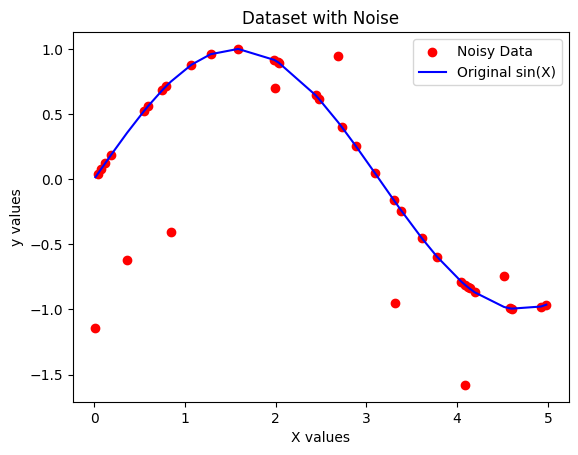

In [10]:

plt.scatter(X, y, color='red', label="Noisy Data")
plt.plot(X, np.sin(X), color='blue', label="Original sin(X)")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Dataset with Noise")
plt.legend()
plt.show()


## Fit Regression Model

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Check the Result

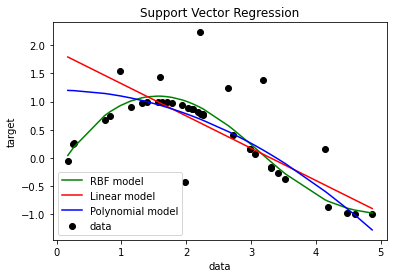

In [ ]:
import pylab as pl
pl.scatter(X, y, c='k', label='data')
pl.plot(X, y_rbf, c='g', label='RBF model')
pl.plot(X, y_lin, c='r', label='Linear model')
pl.plot(X, y_poly, c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

## SVR On Salaries Dataset

## Import libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Import Dataset

In [ ]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:2].values
y = df.iloc[:,2:3].values

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Fitting the Support Vector Regression Model to the dataset

most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian SVR.
We have a non-linear condition so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\soso\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Visualising the Support Vector Regression


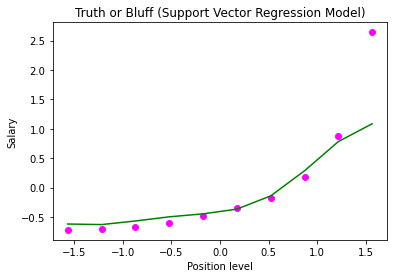

In [ ]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()